# Deep Learning aplicado a un guión de película

In [3]:
import pandas as pd

## Importación del guión a Df

In [4]:
# Leer el archivo CSV
df = pd.read_csv("subtitulos.csv", encoding="utf-8")

In [9]:
# Mostrar todo el contenido en varias filas para cada columna
pd.set_option('display.max_colwidth', None)
df.sample(5)

,inicio,fin,subtitulo
948,"01:19:41,135","01:19:45,014",- Déjame arreglarlo. - Buena idea.
119,"00:10:00,498","00:10:02,416",35 años...
1190,"01:44:15,724","01:44:17,351",Mierda.
764,"01:01:26,528","01:01:31,575",Pero te voy a decir una cosa sobre Jerry Maguire.
831,"01:07:59,273","01:08:02,735",Demuéstrales que disfrutas el juego.


In [10]:
df.shape

(1486, 3)

## NLP

In [7]:
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
import string

In [8]:
# Cargar modelo de español
nlp = spacy.load("es_core_news_sm")

In [9]:
# Función para limpiar el texto: convertir a minúsculas y eliminar puntuación
def limpiar_texto(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

In [10]:
# Aplicar limpieza al subtítulo
df['subtituloLimpio'] = df['subtitulo'].apply(limpiar_texto)

In [11]:
# Tokenizar cada subtítulo usando SpaCy
df["tokens"] = df["subtituloLimpio"].apply(lambda text: [token.text for token in nlp(text)])

In [12]:
df[["subtitulo","subtituloLimpio", "tokens"]].sample(5)

,subtitulo,subtituloLimpio,tokens
1265,¿Qué quieres? ¿Mi alma?,¿qué quieres ¿mi alma,"[¿, qué, quieres, ¿, mi, alma]"
888,"""¿Venir sin estar invitado?"" Así que tu Romeo ...",¿venir sin estar invitado así que tu romeo te ...,"[¿, venir, sin, estar, invitado, así, que, tu,..."
344,"- Hola. - Hola, Tee Pee.",hola hola tee pee,"[ , hola, , hola, tee, pee]"
1378,Nos encantaría ver algo de movimiento.,nos encantaría ver algo de movimiento,"[nos, encantaría, ver, algo, de, movimiento]"
827,"Escucha, Rod, te digo esto con todo el respeto.",escucha rod te digo esto con todo el respeto,"[escucha, rod, te, digo, esto, con, todo, el, ..."


In [13]:
# Eliminar stopwords de los tokens
df["tokensSinStopwords"] = df["tokens"].apply(lambda tokens: [token for token in tokens if not nlp.vocab[token].is_stop])
# df['tokens_sin_stopwords'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in STOP_WORDS])

In [14]:
df[["subtitulo", "tokens","tokensSinStopwords"]].sample(5)

,subtitulo,tokens,tokensSinStopwords
68,Que le jodan.,"[que, le, jodan]",[jodan]
313,Fenomenal.,[fenomenal],[fenomenal]
74,¿Una alucinación? Una iluminación.,"[¿, una, alucinación, una, iluminación]","[¿, alucinación, iluminación]"
403,¿Quién se viene conmigo?,"[¿, quién, se, viene, conmigo]","[¿, viene]"
240,Es como una fobia.,"[es, como, una, fobia]",[fobia]


In [15]:
# Lematizar los tokens (eliminar stopwords primero si es necesario)
df["tokensLematizados"] = df["tokensSinStopwords"].apply(lambda tokens: [nlp(token)[0].lemma_ for token in tokens])

In [16]:
df[["subtitulo", "tokens","tokensSinStopwords","tokensLematizados"]].sample(5)

,subtitulo,tokens,tokensSinStopwords,tokensLematizados
901,Es un placer. Mira lo que traje.,"[es, un, placer, mira, lo, que, traje]","[placer, mira, traje]","[placer, mirar, traje]"
1418,Quizás tenéis razón. El hombre es el enemigo.,"[quizás, tenéis, razón, el, hombre, es, el, en...","[tenéis, razón, hombre, enemigo]","[tenéis, razón, hombre, enemigo]"
1479,¿Qué? No vamos a lanzarlo a la final mañana...,"[¿, qué, no, vamos, a, lanzarlo, a, la, final,...","[¿, lanzarlo, mañana]","[¿, lanzar él, mañana]"
1019,"Si no te importa, gracias.","[si, no, te, importa, gracias]","[importa, gracias]","[importar, gracias]"
1375,¿Me oyes?,"[¿, me, oyes]","[¿, oyes]","[¿, oy]"


## Análisis de Sentimiento

In [17]:
from textblob import TextBlob

# Función para obtener la polaridad del sentimiento
def sentimientoTextblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Devuelve el puntaje de polaridad (-1 a 1)

In [18]:
# Aplicar el análisis de sentimiento a los subtítulos originales
df['sentimiento'] = df['subtitulo'].apply(sentimientoTextblob)

In [19]:
df[["subtitulo", "sentimiento"]].sample(5)

,subtitulo,sentimiento
1292,"Hey Rod, ¿qué tal estás? ¿Cómo va todo?",0.00
1082,- ¿La quieres? - ¿Cómo puedo saberlo?,0.00
883,Solo.,0.00
667,No tienes mensajes.,0.00
395,Llamadme sentimental...,-0.25


In [20]:
df[["sentimiento"]].describe()

,sentimiento
count,1486.000000
mean,-0.000585
std,0.055696
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.600000


Me parece demasiado neutral el análisis de sentimiento.

In [23]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [27]:
from textblob import TextBlob

def sentimiento_frases(text):
    sentences = TextBlob(text).sentences
    return sum(sentence.sentiment.polarity for sentence in sentences) / len(sentences)

df['sentimientoSentence'] = df['subtitulo'].apply(sentimiento_frases)

In [28]:
# Mostrar todo el contenido en varias filas para cada columna
pd.set_option('display.max_colwidth', None)

df[['sentimientoSentence','subtitulo']].sample(5)

,sentimientoSentence,subtitulo
36,0.0,Yo dirijo las vidas y los sueños...
577,0.0,Un contrato con Jerry Maguire.
798,0.0,"- Hablemos del contrato, Dennis. - Estaré en El Crocodile a las ocho."
879,0.0,¿Cómo es posible?
1327,0.0,- ¿Qué dice papá siempre? - No es tan malo como parece.


### Análisis de Sentimiento con VADER

Buscando otro método que quizás me realice una mejor clasificación de sentimientos es que voy a probar VADER.

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Asegúrate de que los datos necesarios estén descargados
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...


True

In [30]:
sia = SentimentIntensityAnalyzer()

def sentimiento_vader(text):
    scores = sia.polarity_scores(text)
    return scores['compound']  # Devuelve el puntaje general de sentimiento

df['sentimientoVader'] = df['subtitulo'].apply(sentimiento_vader)

In [39]:
df[['sentimientoVader', 'subtitulo']].sample(5)

,sentimientoVader,subtitulo
708,0.000,Sí.
913,-0.296,"No, tú te quedas con Chad y te portas bien. Dame un beso."
821,0.000,"Esos desgraciados podrán tener pasta, pero nunca tendrán el quan."
1151,0.000,Le vas a echar de menos el año que viene.
1064,-0.296,Seguiremos a flote. No te vayas.


In [40]:
df['sentimientoVader'].describe()

count    1486.000000
mean       -0.036641
std         0.159777
min        -0.802000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.636900
Name: sentimientoVader, dtype: float64

Ahora me parece que tenemos un resultado mejor con VADER. Los sentimientos en 0 han disminuído.

In [42]:
# Obtener los 10 subtítulos más positivos
top_positivos = df.nlargest(10, 'sentimientoVader')[['sentimientoVader', 'subtitulo']]

# Obtener los 10 subtítulos más negativos
top_negativos = df.nsmallest(10, 'sentimientoVader')[['sentimientoVader', 'subtitulo']]

In [43]:
# Mostrar resultados
print("Subtítulos más positivos:")
top_positivos

Subtítulos más positivos:


,sentimientoVader,subtitulo
1473,0.6369,"- ¿Te gustó el zoo, chaval? - Ha sido genial."
823,0.6124,"Es amor, respeto, clase y dinero. El paquete completo."
1463,0.6124,- Sólo tenemos media hora. - Con amor a mi línea ofensiva.
25,0.5994,- Tenemos que ganar Super Bowls. - Mis respetos.
40,0.5994,...emitido durante la Super Bowl que estés ganando.
65,0.5994,...Guerreros VR Super Trooper.
1307,0.5994,Vamos a un Super Bowl consecutivo.
1465,0.5994,"- ¿Recuerdas a Troy del Super Bowl? - Sí, nos conocimos en el 93."
1346,0.5859,- Ha podido controlar la pelota. - Se ha hecho daño.
217,0.4767,Sé lo de la fiesta.


In [44]:
print("\nSubtítulos más negativos:")
top_negativos


Subtítulos más negativos:


,sentimientoVader,subtitulo
974,-0.8020,"- Sin barreras, sin fronteras. - Vale Chad, ya lo entiendo."
843,-0.7906,No bailo y no participo en pretemporadas sin contrato.
1219,-0.7003,No me gusta ver películas sin ti.
1365,-0.7003,...y no funciona sin él.
1040,-0.6808,"- Mira. Rod, lee esto. - No, no, no."
609,-0.6249,Una verdad brutal. ¿Recuerdas?
1106,-0.6072,- ¿Puedes conducir esta cosa? - ¿Esto? Sin problemas.
1266,-0.5803,- ¿Por qué no? Me lo merezco. - ¿Y qué pasa si yo no soy así?
254,-0.5574,- Hola. - Cuánto tiempo sin verte.
420,-0.5574,Veremos qué tal les va sin nosotros.


Comentario:xxxxxxxxxx

### Análisis con TF-IDF vectorizer

In [49]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtener stopwords en español
stop_words_es = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Inicializar el vectorizador TF-IDF
tfidf = TfidfVectorizer(stop_words=stop_words_es, max_features=500)

# Generar la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(df['subtitulo'])

In [51]:
# Convertir la matriz en un DataFrame para inspección
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [52]:
# Mostrar las primeras filas del DataFrame resultante
tfidf_df.head()

,100,11,110,14,16,17,18,20,24,26,...,wendy,wilburn,yardas,zapatos,zoo,zumo,ésa,ésta,éste,único
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Calcular los puntajes promedio de cada palabra en todas las filas
tfidf_scores = tfidf_df.mean().sort_values(ascending=False)

# Mostrar las 10 palabras más relevantes según TF-IDF
print("Palabras más relevantes:")
print(tfidf_scores.head(10))

Palabras más relevantes:
jerry      0.021226
bien       0.019276
quiero     0.018885
gracias    0.014444
hola       0.011665
quieres    0.011499
si         0.011457
rod        0.011077
voy        0.010838
vamos      0.010827
dtype: float64


In [55]:
# Agregar la suma de TF-IDF de cada subtítulo como una métrica adicional
df['tfidf_sum'] = tfidf_df.sum(axis=1)

# Combinar con sentimiento
df[['subtitulo', 'sentimientoVader', 'tfidf_sum']].sort_values('sentimientoVader', ascending=False).head(10)

,subtitulo,sentimientoVader,tfidf_sum
1473,"- ¿Te gustó el zoo, chaval? - Ha sido genial.",0.6369,1.996664
823,"Es amor, respeto, clase y dinero. El paquete completo.",0.6124,1.723515
1463,- Sólo tenemos media hora. - Con amor a mi línea ofensiva.,0.6124,1.991616
65,...Guerreros VR Super Trooper.,0.5994,1.000000
1307,Vamos a un Super Bowl consecutivo.,0.5994,1.716103
40,...emitido durante la Super Bowl que estés ganando.,0.5994,1.413570
1465,"- ¿Recuerdas a Troy del Super Bowl? - Sí, nos conocimos en el 93.",0.5994,1.998717
25,- Tenemos que ganar Super Bowls. - Mis respetos.,0.5994,1.000000
1346,- Ha podido controlar la pelota. - Se ha hecho daño.,0.5859,1.995310
217,Sé lo de la fiesta.,0.4767,1.403394


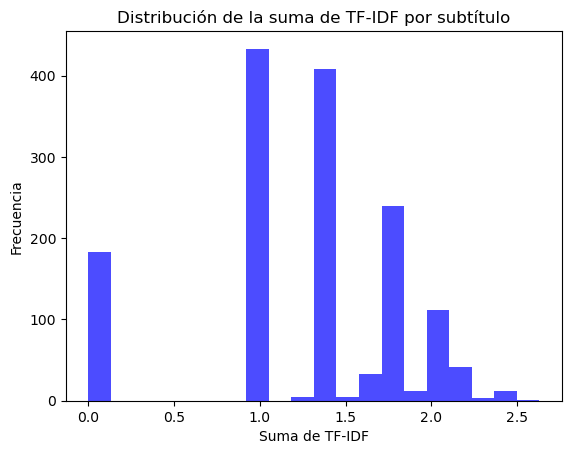

In [56]:
import matplotlib.pyplot as plt

plt.hist(df['tfidf_sum'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de la suma de TF-IDF por subtítulo')
plt.xlabel('Suma de TF-IDF')
plt.ylabel('Frecuencia')
plt.show()

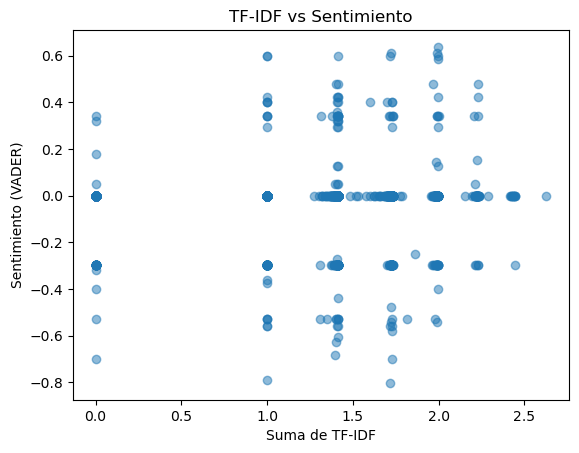

In [57]:
plt.scatter(df['tfidf_sum'], df['sentimientoVader'], alpha=0.5)
plt.title('TF-IDF vs Sentimiento')
plt.xlabel('Suma de TF-IDF')
plt.ylabel('Sentimiento (VADER)')
plt.show()

### Nube de Palabras

In [59]:
X = tfidf.fit_transform(df['subtitulo'])

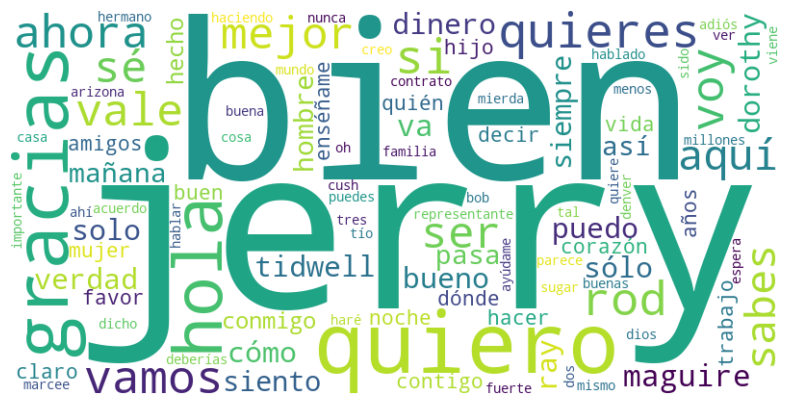

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtener las palabras y sus puntuaciones TF-IDF
# Aquí estamos utilizando el atributo `get_feature_names_out()` que te da las palabras,
# y el atributo `toarray()` para obtener las puntuaciones de TF-IDF
words = tfidf.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1  # Sumar las puntuaciones de cada palabra

# Crear un diccionario de palabras con sus correspondientes puntuaciones
word_dict = dict(zip(words, tfidf_scores))

# Generar la nube de palabras con las palabras y puntuaciones obtenidas
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
# Generar la nube de palabras con algunas opciones de personalización
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate_from_frequencies(word_dict)


# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.show()